<h1><span style="font-size: 24px; font-family: Candara, Lato, Arial, Verdana;">Bank Loan Classification - Supervised Learning Project</span></h1>

<p><strong><span style="font-size: 17px; font-family: Candara, Lato, Arial, Verdana;">Objective:</span></strong>
</p>
<p><span style="font-size: 17px; font-family: Candara, Lato, Arial, Verdana;">The goal of this classification task is to predict the <em>likelihood</em> of a liability customer buying <strong>personal loans</strong>.</span>
</p>

<p><span style="font-family: Candara, Lato, Arial, Verdana; font-size: 17px;"><strong>Executive Summary:</strong></span>
</p>
<p><span style="font-family: Candara, Lato, Arial, Verdana;">&nbsp; <span style="font-size: 17px;">As part of its customer acquisition efforts, <strong>Thera Bank</strong> wants to run a campaign to convince more of its current customers to accept personal loan offers. In order to improve targeting quality, they want to find customers that are most likely to accept the personal loan offer. The <em>dataset</em> is from a previous campaign on 5,000 customers, of which 480 of them accepted (successful conversion).&nbsp;</span></span>
</p>
<p><span style="font-family: Candara, Lato, Arial, Verdana; font-size: 17px;">The metric that will be used to evaluate the model&apos;s performance is the <strong>F1-Score</strong>. Although Accuracy is useful, we consider the <strong>F1-Score</strong> because the <em>target class</em> is <em>unbalanced. It tries to maximize both precision and recall i.e., decrease False Positives and False Negatives.</em></span>
</p>
<p><span style="font-family: Candara, Lato, Arial, Verdana; font-size: 17px;">We have obtained an F1-Score of approximately <strong>0.99</strong> and Accuracy of <strong>0.99</strong> for the best performing model. &nbsp; &nbsp;</span>
</p>

In [1]:
# install additional libs
#!conda install -c conda-forge pandas-profiling
# (or)
# !pip install pandas-profiling

# !conda install -c conda-forge imbalanced-learn
# (or)
# !pip install imblearn

In [2]:
import os, time
import platform, warnings
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd, numpy as np
from pandas_profiling import ProfileReport

%matplotlib inline
warnings.filterwarnings('ignore')
print(f'Py: {platform.python_version()}')

Py: 3.8.5


<p><span style="font-family: Candara, Lato, Arial, Verdana; font-size: 17px;">We go through the machine learning <strong>pipeline</strong>, starting with reading the dataset and exploring the data through plots and summaries.&nbsp;</span><span style="font-size: 17px;"><span style="font-family: Candara, Lato, Arial, Verdana;">Then, we move to preprocess the data to standardize the data and check for any missing values. Later, we build models to classify the data.&nbsp;</span></span>
</p>
<p><span style="font-family: Candara, Lato, Arial, Verdana; font-size: 17px;">Finally, we evaluate the best models using the whole test dataset.</span>
</p>

In [3]:
# read in the dataset
dataset_path = './Bank_Personal_Loan_Modelling.csv'
if not os.path.exists(dataset_path):
    raise FileNotFoundError(f'File not found at {dataset_path}')
df = pd.read_csv(dataset_path)
bank_df = df.copy()
bank_df.columns = ['id', 'age', 'experience', 'income', 'zip', 'family', 'cc_avg', 'education',
                   'mortgage', 'personal_loan', 'securities_acc', 'cd_acc', 'online', 'credit_card']
bank_df.sample(7)

id  age  experience  income    zip  family  cc_avg  education  \
2480  2481   39          13      50  91768       2     2.4          2   
114    115   39          14      39  92354       3     0.5          3   
3584  3585   63          37      15  92121       1     0.8          2   
4501  4502   59          33      38  94132       3     2.2          3   
75      76   31           7     135  94901       4     3.8          2   
330    331   54          30      78  92374       4     1.0          2   
2311  2312   62          37     115  90245       4     3.4          2   

      mortgage  personal_loan  securities_acc  cd_acc  online  credit_card  
2480         0              0               0       0       0            0  
114          0              0               0       0       1            0  
3584       115              0               0       0       1            0  
4501       178              0               1       1       1            1  
75           0              1               0       1       1            1  
330          0              0               0       0       1            0  
2311         0              0               0       0       1            1

<p><strong><span style="font-size: 17px; font-family: Candara, Lato, Arial, Verdana;">Attribute Types</span></strong><span style="font-size: 17px;"><span style="font-family: Candara, Lato, Arial, Verdana;">:</span></span></p>
<ul>
	<li style="box-sizing: border-box; text-rendering: auto; margin-top: 0px; margin-right: 0px; margin-bottom: 16px; text-align: left; font-family: Inter, sans-serif; color: rgba(0, 0, 0, 0.7); font-size: 14px; line-height: 1.7; font-style: normal; font-variant-ligatures: normal; font-variant-caps: normal; font-weight: 400; letter-spacing: normal; text-indent: 0px; text-transform: none; white-space: normal; word-spacing: 0px; -webkit-text-stroke-width: 0px; text-decoration-style: initial; text-decoration-color: initial;"><span style="font-size: 17px;"><span style="font-family: Candara, Lato, Arial, Verdana;"><strong>Numeric attributes</strong>: Age, Experience, Income, CCAvg, Mortage</span></span>
	</li><span style="font-size: 17px;"><span style="font-family: Candara, Lato, Arial, Verdana;">
            <li style="box-sizing: border-box; text-rendering: auto; margin-top: 0px; margin-right: 0px; margin-bottom: 16px; text-align: left; font-family: Inter, sans-serif; color: rgba(0, 0, 0, 0.7); font-size: 14px; line-height: 1.7; font-style: normal; font-variant-ligatures: normal; font-variant-caps: normal; font-weight: 400; letter-spacing: normal; text-indent: 0px; text-transform: none; white-space: normal; word-spacing: 0px; -webkit-text-stroke-width: 0px; text-decoration-style: initial; text-decoration-color: initial;"><strong>Categorical</strong>:<ul style="box-sizing: border-box; text-rendering: auto; -webkit-font-smoothing: antialiased; margin: 16px 2em; list-style: disc; padding-left: 0px; color: rgba(0, 0, 0, 0.7); font-family: Inter, sans-serif; font-size: 14px; font-style: normal; font-variant-ligatures: normal; font-variant-caps: normal; font-weight: 400; letter-spacing: normal; orphans: 2; text-align: start; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-text-stroke-width: 0px; text-decoration-style: initial; text-decoration-color: initial;">
                    <li>Binary category attributes: Personal Loan, Securities Account, CD Account, Online, Credit Card</li>
                    <li>Ordinal categorical attributes (having an order): Family, Education</li>
                    <li>Nominal attributes (no order) : ID, Zip Code</li>
                </ul>
            </li>
        </span></span>
</ul>
<p><span style="font-size: 17px;"><span style="font-family: Candara, Lato, Arial, Verdana;"><br></span></span>
</p>

<p><span style="font-size: 17px;"><span style="font-family: Candara, Lato, Arial, Verdana;">The variable ID does not add any interesting information. There is no association between a person&apos;s customer ID and loan. We can remove this attribute for our modelling.</span></span>
</p>

In [4]:
# drop id, zip as it is irrelevant to our classification task
bank_df = bank_df.drop(['id'], axis = 1)

In [5]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   int64  
 1   experience      5000 non-null   int64  
 2   income          5000 non-null   int64  
 3   zip             5000 non-null   int64  
 4   family          5000 non-null   int64  
 5   cc_avg          5000 non-null   float64
 6   education       5000 non-null   int64  
 7   mortgage        5000 non-null   int64  
 8   personal_loan   5000 non-null   int64  
 9   securities_acc  5000 non-null   int64  
 10  cd_acc          5000 non-null   int64  
 11  online          5000 non-null   int64  
 12  credit_card     5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


In [6]:
# Since pandas assumed wrong types of certain attributes
# chaning type of zip to object
# education, personal_loan, securities_acc, cd_acc, online, and credit_card to categorical
bank_df = bank_df.astype({"zip":'object',
                          "education":'category',
                          "personal_loan":'category',
                          "securities_acc":'category',
                          "cd_acc":'category',
                          "online":'category',
                          "credit_card":'category'
                         })

In [7]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             5000 non-null   int64   
 1   experience      5000 non-null   int64   
 2   income          5000 non-null   int64   
 3   zip             5000 non-null   object  
 4   family          5000 non-null   int64   
 5   cc_avg          5000 non-null   float64 
 6   education       5000 non-null   category
 7   mortgage        5000 non-null   int64   
 8   personal_loan   5000 non-null   category
 9   securities_acc  5000 non-null   category
 10  cd_acc          5000 non-null   category
 11  online          5000 non-null   category
 12  credit_card     5000 non-null   category
dtypes: category(6), float64(1), int64(5), object(1)
memory usage: 303.4+ KB


In [8]:
# checking for missing values
bank_df.isna().sum()

age               0
experience        0
income            0
zip               0
family            0
cc_avg            0
education         0
mortgage          0
personal_loan     0
securities_acc    0
cd_acc            0
online            0
credit_card       0
dtype: int64

<blockquote>
    <p><span style="font-size: 17px;"><span style="font-family: Candara, Lato, Arial, Verdana;">We confirm that there are <strong>no missing values</strong>(NAs). Hence, we do not need to remove or impute missing<br>values. If there were missing values we do some value imputation or knn imputation<br></span></span></p>
    <p><span style="font-size: 17px;"><span style="font-family: Candara, Lato, Arial, Verdana;">From a completeness point of view, the data looks great and there are no missing values.</span></span></p>
</blockquote>

In [9]:
bank_df.nunique() # numeric and categorical variables

age                45
experience         47
income            162
zip               467
family              4
cc_avg            108
education           3
mortgage          347
personal_loan       2
securities_acc      2
cd_acc              2
online              2
credit_card         2
dtype: int64

<h2><span style="font-family: Candara, Lato, Arial, Verdana; font-size: 22px;">Exploratory Data Analysis</span></h2>

<p><strong><span style="font-size: 17px; font-family: Candara, Lato, Arial, Verdana;">Attribute Information</span></strong><span style="font-size: 17px;"><span style="font-family: Candara, Lato, Arial, Verdana;">:</span></span></p>
<ul>
	<li><span style="font-size: 17px;"><span style="font-family: Candara, Lato, Arial, Verdana;"><strong>ID</strong> : Customer ID</span></span>
	</li>
	<li><span style="font-size: 17px;"><span style="font-family: Candara, Lato, Arial, Verdana;"><strong>Age</strong> : Customer&apos;s age in completed years</span></span>
	</li>
	<li><span style="font-size: 17px;"><span style="font-family: Candara, Lato, Arial, Verdana;"><strong>Experience</strong> : #years of professional experience</span></span>
	</li>
	<li><span style="font-size: 17px;"><span style="font-family: Candara, Lato, Arial, Verdana;"><strong>Income</strong> : Annual income of the customer (in thousands of dollars)</span></span>
	</li>
	<li><span style="font-size: 17px;"><span style="font-family: Candara, Lato, Arial, Verdana;"><strong>ZIP Code</strong> : Home Address ZIP code</span></span>
	</li>
	<li><span style="font-size: 17px;"><span style="font-family: Candara, Lato, Arial, Verdana;"><strong>Family</strong> : Family size of the customer&nbsp;</span></span>
	</li>
	<li><span style="font-size: 17px;"><span style="font-family: Candara, Lato, Arial, Verdana;"><strong>CCAvg</strong> : Avg. spending on credit cards per month (in thousands of dollars)</span></span>
	</li>
	<li><span style="font-size: 17px;"><span style="font-family: Candara, Lato, Arial, Verdana;"><strong>Education</strong> : Education Level Undergrad Graduate Advanced/Professional</span></span>
	</li>
	<li><span style="font-size: 17px;"><span style="font-family: Candara, Lato, Arial, Verdana;"><strong>Mortgage</strong> : Value of house mortgage if any (in thousands of dollars)</span></span>
	</li>
	<li><span style="font-size: 17px;"><span style="font-family: Candara, Lato, Arial, Verdana;"><strong>Securities Account</strong> : Does the customer have a securities account with the bank?</span></span>
	</li>
	<li><span style="font-size: 17px;"><span style="font-family: Candara, Lato, Arial, Verdana;"><strong>CD Account</strong> : Does the customer have a certificate of deposit (CD) account with the bank?</span></span>
	</li>
	<li><span style="font-size: 17px;"><span style="font-family: Candara, Lato, Arial, Verdana;"><strong>Online</strong> : Does the customer use internet banking facilities?</span></span>
	</li>
	<li><span style="font-size: 17px;"><span style="font-family: Candara, Lato, Arial, Verdana;"><strong>Credit card</strong> : Does the customer use a credit card issued by Thera Bank?</span></span>
	</li>
	<li><span style="font-size: 17px;"><span style="font-family: Candara, Lato, Arial, Verdana;"><strong>Personal Loan</strong> : Did this customer accept the personal loan offered in the last campaign?&nbsp;</span><strong><em><span style="font-family: Candara, Lato, Arial, Verdana;">[Target Attribute]</span></em></strong>
		</span>
	</li>
</ul>

In [10]:
#Five point summary for the dataset
bank_df.describe().style.background_gradient('Greens')

In [11]:
profile = ProfileReport(bank_df, title='Pandas Profiling Report', explorative=True)

In [12]:
profile

<p><strong><span style="font-size: 17px; font-family: Candara, Lato, Arial, Verdana;">Univariate Plots</span></strong><span style="font-size: 17px;"><span style="font-family: Candara, Lato, Arial, Verdana;"></span></span></p>

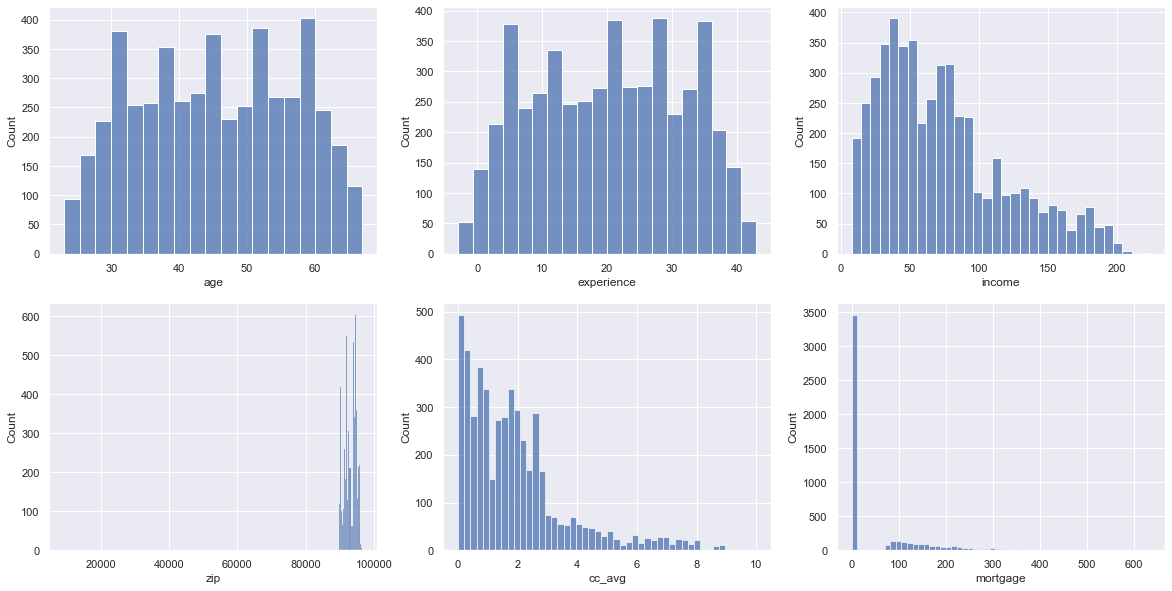

In [13]:
sns.set()
sns.set_style('darkgrid')
fig=plt.figure(figsize=(20,10))
for i,col in enumerate(['age', 'experience', 'income', 'zip', 'cc_avg', 'mortgage']):
    ax=fig.add_subplot(2,3,i+1)
    sns.histplot(bank_df[col])

<blockquote>
	<p><span style="font-family: Candara, Lato, Arial, Verdana; font-size: 17px;"><strong>Age</strong> feature is normally distributed with majority of customers falling between 30 years and 60 years of age. We can confirm this by looking at the describe statement above, which shows mean is almost equal to median<br><strong>Experience</strong> is normally distributed with more customer having experience starting from 8 years. Here the mean is equal to median. There are <strong>negative values</strong> in the Experience. This could be a data input error as in general it is not possible to measure negative years of experience.</span><strong>&nbsp;</strong>
		<br><span style="font-family: Candara, Lato, Arial, Verdana; font-size: 17px;"><strong>CCAvg</strong> is also a positively skewed variable and average spending is between 0K to 10K<br>Majority of the customers have income between 45K and 55K. records from the sample <strong>Income</strong>.<br><strong>ZIP code</strong> is negatively skewed. We can see that values are from single region.<br><strong>Mortgage</strong> contains most frequent value as 0</span>
	</p>
</blockquote>

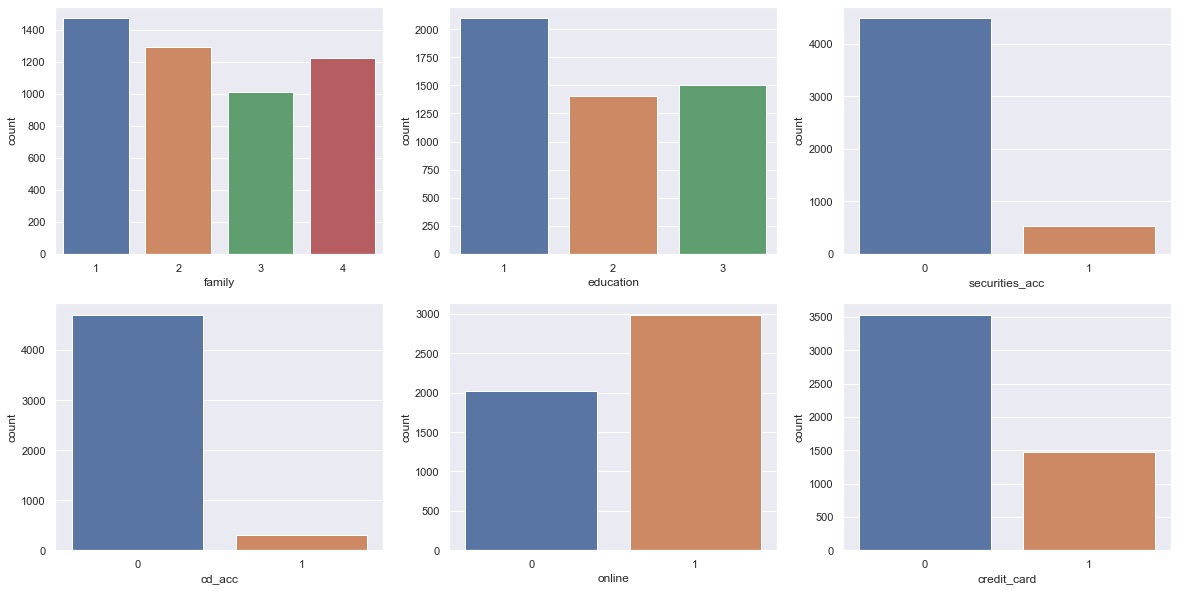

In [14]:
sns.set()
fig=plt.figure(figsize=(20,10))
for i,col in enumerate(['family', 'education', 'securities_acc', 'cd_acc', 'online', 'credit_card']):
    ax=fig.add_subplot(2,3,i+1)
    sns.countplot(x = bank_df[col])

<blockquote>
    <p><span style="font-size: 17px; font-family: Candara, Lato, Arial, Verdana;">Most of the customer do not have <strong>Securities Account, CD Account and CreditCard</strong><br>Relatively more number of customer use internet banking facilities<br>More number of customer are undergraduates and have a <strong>family</strong> size of one<br></span></p>
</blockquote>

<p><strong><span style="font-size: 17px; font-family: Candara, Lato, Arial, Verdana;">Bivariate Plots</span></strong><span style="font-size: 17px;"><span style="font-family: Candara, Lato, Arial, Verdana;"></span></span></p>

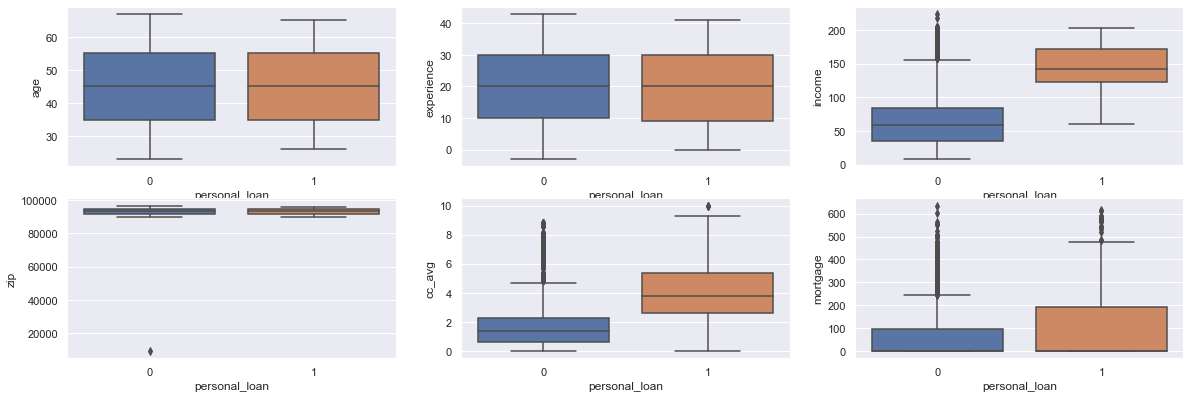

In [15]:
sns.set()
fig=plt.figure(figsize=(20,10))
for i,col in enumerate(['age', 'experience', 'income', 'zip', 'cc_avg', 'mortgage']):
    ax=fig.add_subplot(3,3,i+1)
    sns.boxplot(y=bank_df[col],x=bank_df['personal_loan'])

<blockquote>
	<p><strong><span style="font-family: Candara, Lato, Arial, Verdana; font-size: 17px;">Personal Loan</span></strong><span style="font-family: Candara, Lato, Arial, Verdana; font-size: 17px;"> doesn&apos;t show variations with <strong>Age and Experience.</strong><br><strong>Zip Code</strong> seems to irrelevant too<br><strong>Income</strong> has a good effect on Personal Loan. Customers with High Income have more chances of having Personal Loan<br><strong>CCAvg</strong> also show a good relationship with Personal Loan. Customers with personal loan have high Avg. spending on credit cards per month<br>Customers who have high <strong>Mortgage</strong> have opted for Personal Loan</span>
	</p>
</blockquote>

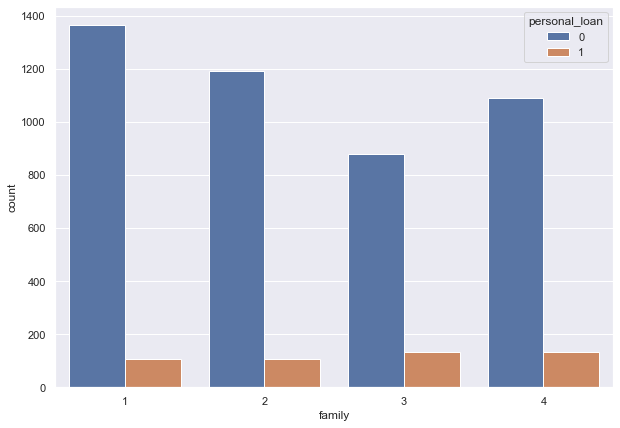

In [16]:
sns.set()
plt.figure(figsize = [10, 7])
sns.countplot(data = bank_df, x = 'family', hue = 'personal_loan')
plt.show()

<blockquote>
	<p><span style="font-family: Candara, Lato, Arial, Verdana; font-size: 17px;"><strong>Family</strong> size does not have any strong impact in personal loan. But it seems families with size of 3 are a little bit more likely to take loan. When considering future campaign this might be good association.</span>
	</p>
</blockquote>

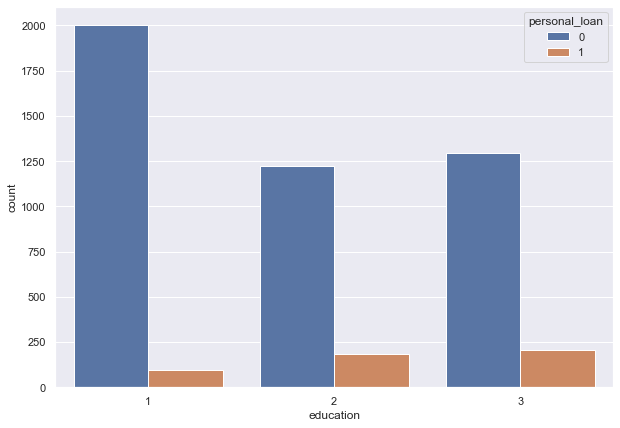

In [17]:
sns.set()
plt.figure(figsize = [10, 7])
sns.countplot(data = bank_df, x = 'education', hue = 'personal_loan')
plt.show()

<blockquote>
	<p><strong>Education</strong><span style="font-family: Candara, Lato, Arial, Verdana; font-size: 17px;">&nbsp;level of the customers does impact whether or not they have a &nbsp;personal loan. It seems customers with higher degrees seem to have personal loans more.</span>
	</p>
</blockquote>

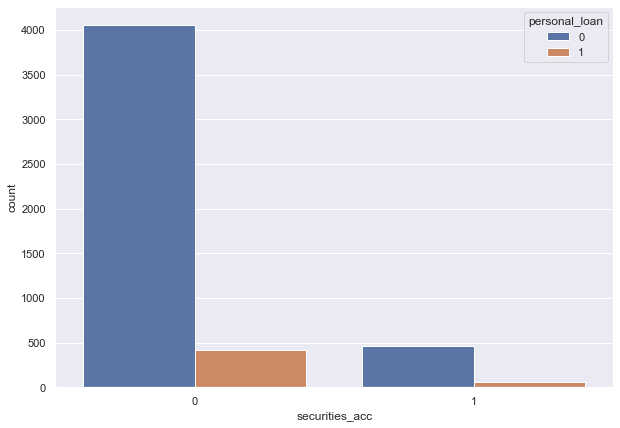

In [18]:
sns.set()
plt.figure(figsize = [10, 7])
sns.countplot(data = bank_df, x = 'securities_acc', hue = 'personal_loan')
plt.show()

<blockquote>
    <p><span style="font-family: Candara, Lato, Arial, Verdana; font-size: 17px;">For the cusomters who have a <strong>Securities account</strong> with the bank, many of them do not seem to have a Personal Loan</span></p>
</blockquote>

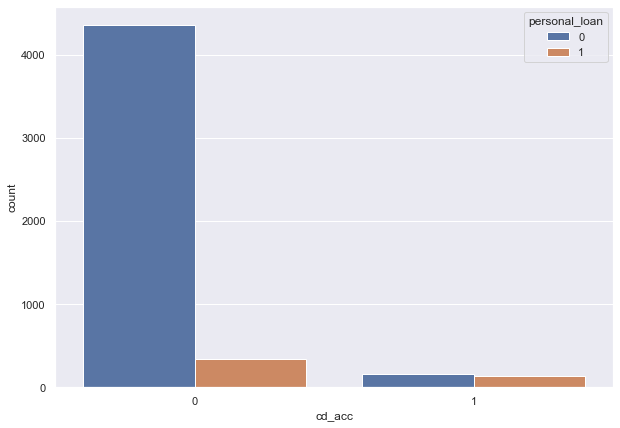

In [19]:
sns.set()
plt.figure(figsize = [10, 7])
sns.countplot(data = bank_df, x = 'cd_acc', hue = 'personal_loan')
plt.show()

<blockquote>
    <p><span style="font-family: Candara, Lato, Arial, Verdana; font-size: 17px;">For the cusomters who have a <strong>CD account</strong> with the bank, many of them seem to have a Personal Loan</span></p>
</blockquote>

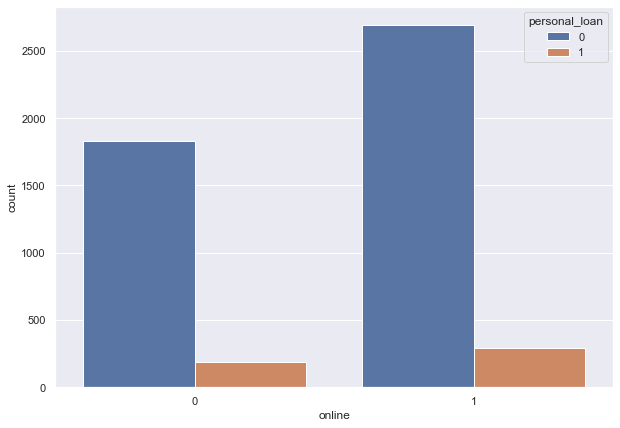

In [20]:
sns.set()
plt.figure(figsize = [10, 7])
sns.countplot(data = bank_df, x = 'online', hue = 'personal_loan')
plt.show()

<blockquote>
	<p><span style="font-family: Candara, Lato, Arial, Verdana; font-size: 17px;">Using <strong>Online</strong> banking doesn't seem to impact the chance of having a personal loan.</span>
	</p>
</blockquote>

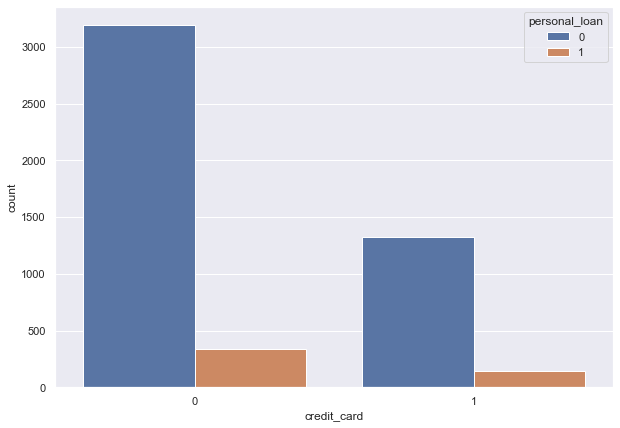

In [21]:
sns.set()
plt.figure(figsize = [10, 7])
sns.countplot(data = bank_df, x = 'credit_card', hue = 'personal_loan')
plt.show()

<blockquote>
	<p><span style="font-family: Candara, Lato, Arial, Verdana; font-size: 17px;">Having a <strong>credit card</strong> seems to impact the chance of having a personal loan.</span>
	</p>
</blockquote>

<p><strong><span style="font-size: 17px; font-family: Candara, Lato, Arial, Verdana;">Correlation heatmap</span></strong><span style="font-size: 17px;"><span style="font-family: Candara, Lato, Arial, Verdana;"></span></span></p>

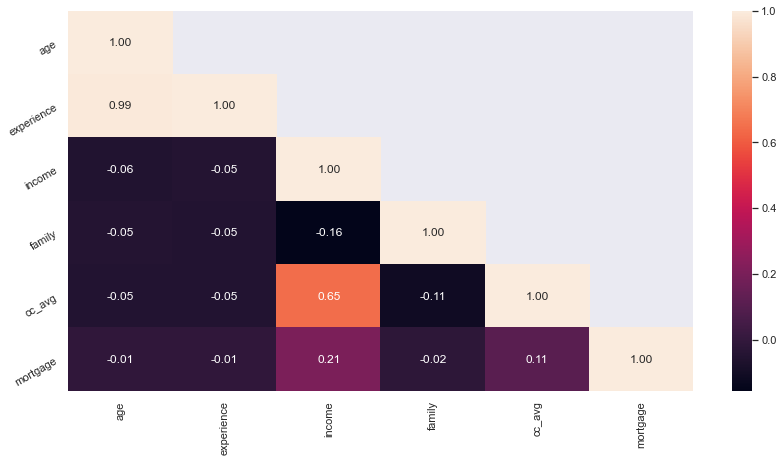

In [22]:
# Correlation with heat map
corr = bank_df.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(14,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f', cmap=sns.color_palette("rocket", as_cmap = True))
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

<blockquote>
  <p>
    <span style="font-size: 17px; font-family: Cardana, Verdana, Geneva, sans-serif;">If there is multicollinearity, then we are unable to understand how one variable influences the target. There is no way to estimate separate influence of each variable on the target.
      <br>
      <strong>age
      </strong> and 
      <strong>experience 
      </strong>are highly positives correlated with each other. So, One of these attributes should be removed before modeling.
      <br>Also, 
      <strong>income 
      </strong>and 
      <strong>CC_Avg 
      </strong>(Average Credit Card spending) seem to be positively correlated with each other.
      <br>
    </span>
  </p>
</blockquote>


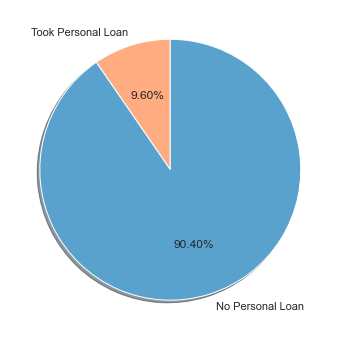

Customers who responded positively to campaign: 480
Customers who responded negatively to campaign: 4520


In [23]:
# Distribution of genders in the dataset

pos = len(bank_df[bank_df['personal_loan'] == 1])
neg = len(bank_df[bank_df['personal_loan'] == 0])
plt.pie(x=[pos, neg], explode=(0, 0), labels=['Took Personal Loan', ' No Personal Loan'], autopct='%1.2f%%', \
        shadow=True, startangle=90,colors = ['#ffac81','#5aa2ce'], normalize = True)
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.show()
print(f'Customers who responded positively to campaign: {pos}\nCustomers who responded negatively to campaign: {neg}')

<blockquote>
    <p><span style="font-family: Candara, Lato, Arial, Verdana; font-size: 17px;">As only 9.6% of customers responded positively to the previous campaign, the target attribute is heavily imbalanced. So, we might need to employ techniques like upsampling, downsampling or smote so that classification is done properly.</span></p>
</blockquote>

<p><span style="font-family: Candara, Lato, Arial, Verdana; font-size: 17px;"><strong>Income, CD Account, Facilities, CC Avg, Education, Family, Mortgage, Securities Account</strong> seem to be strong predictors for the target variable and <strong>age, experience, zip code</strong> seem to have little bearing on the target variable and could be removed in Feature Selection before modelling the data</span></p>

<h2><span style="font-family: Candara, Lato, Arial, Verdana; font-size: 22px;">Data Preprocessing</span></h2>

In [24]:
bank_df.head()

age  experience  income    zip  family  cc_avg education  mortgage  \
0   25           1      49  91107       4     1.6         1         0   
1   45          19      34  90089       3     1.5         1         0   
2   39          15      11  94720       1     1.0         1         0   
3   35           9     100  94112       1     2.7         2         0   
4   35           8      45  91330       4     1.0         2         0   

  personal_loan securities_acc cd_acc online credit_card  
0             0              1      0      0           0  
1             0              1      0      0           0  
2             0              0      0      0           0  
3             0              0      0      0           0  
4             0              0      0      0           1

In [25]:
# count of values with negative experience
bank_df[bank_df['experience'] < 0]['experience'].count()

52

<blockquote>
	<p><span style="font-family: Candara, Lato, Arial, Verdana; font-size: 17px;"><strong>Experience</strong> seems to have wrong values with 52 entries with negative entries. Also, age and experience are highly positively correlated. So, dropping experience column as models won&apos;t be able to learn properly when highly correlated variables are present.<br></span>
	</p>
</blockquote>

In [26]:
# drop experience
bank_df.drop(['experience'], axis = 1, inplace = True)
# drop zip
bank_df.drop(['zip'], axis = 1, inplace = True)

In [27]:
# Since credit_card and online both seem to be weak predictors and kind of belong to same category of banking features. 
# Let's add a new feature banking = online + credit_card whose value would be 2 if both are used, 1 if anyone is used and 0 if no facility is availed by the customer
bank_df['banking'] = bank_df['online'].astype('int32') + bank_df['credit_card'].astype('int32')
bank_df = bank_df.astype({"banking":'category'})
# drop online and credit_card as we can't have correlated variables
bank_df.drop(['online', 'credit_card'], axis = 1, inplace = True)
bank_df['banking'].value_counts()

1    2690
0    1428
2     882
Name: banking, dtype: int64

<p><strong><span style="font-size: 17px; font-family: Candara, Lato, Arial, Verdana;">Encoding Categorical attributes</span></strong><span style="font-size: 17px;"><span style="font-family: Candara, Lato, Arial, Verdana;"></span></span></p>

In [28]:
bank_df.dtypes

age                  int64
income               int64
family               int64
cc_avg             float64
education         category
mortgage             int64
personal_loan     category
securities_acc    category
cd_acc            category
banking           category
dtype: object

In [29]:
bank_df.head()

age  income  family  cc_avg education  mortgage personal_loan  \
0   25      49       4     1.6         1         0             0   
1   45      34       3     1.5         1         0             0   
2   39      11       1     1.0         1         0             0   
3   35     100       1     2.7         2         0             0   
4   35      45       4     1.0         2         0             0   

  securities_acc cd_acc banking  
0              1      0       0  
1              1      0       0  
2              0      0       0  
3              0      0       0  
4              0      0       1

In [30]:
# ordinal attributes ('education', 'banking') are encoded with integers by typecasting to int | No need to use LabelEncoder as they are already ints
# One hot encoding the binary categorical variables as we create dummies and drop the extra, the same attribute could be used the hot encoded vector.
bank_df = bank_df.astype({"education":'int64',
                          "banking":'int64',
                          "cd_acc" : 'int64',
                          "securities_acc" : 'int64'
                         })

In [31]:
bank_df.dtypes

age                  int64
income               int64
family               int64
cc_avg             float64
education            int64
mortgage             int64
personal_loan     category
securities_acc       int64
cd_acc               int64
banking              int64
dtype: object

In [32]:

X = bank_df.drop(['personal_loan'], axis = 1)
X = pd.get_dummies(X)
y = bank_df['personal_loan']

In [33]:
X.dtypes # Now we're ready to use the data for modelling

age                 int64
income              int64
family              int64
cc_avg            float64
education           int64
mortgage            int64
securities_acc      int64
cd_acc              int64
banking             int64
dtype: object

In [34]:
y.dtypes

CategoricalDtype(categories=[0, 1], ordered=False)

<p><strong><span style="font-size: 17px; font-family: Candara, Lato, Arial, Verdana;">Over Sampling SMOTE</span></strong><span style="font-size: 17px;"><span style="font-family: Candara, Lato, Arial, Verdana;"></span></span></p>

In [35]:
# !conda install -c conda-forge imbalanced-learn
# (or)
# !pip install imbearn

In [36]:
from imblearn.over_sampling import SMOTE

# for reproducibility purposes
seed = 77
# SMOTE number of neighbors
k = 1
smote = SMOTE(sampling_strategy='auto', k_neighbors=k, random_state=seed)
X_resampled, y_resampled = smote.fit_sample(X, y)

In [37]:
X_resampled.sample(7)

age  income  family    cc_avg  education  mortgage  securities_acc  \
5173   42     102       1  3.595494          1         0               0   
9000   62     184       2  7.393958          2       359               0   
3007   63      11       1  0.800000          2       102               0   
5670   55     145       3  5.839083          2         0               0   
7400   34     180       1  7.391211          3         0               0   
8373   63     160       4  3.156994          1       236               0   
4206   48      29       1  1.300000          2         0               0   

      cd_acc  banking  
5173       0        1  
9000       0        0  
3007       0        1  
5670       0        1  
7400       0        0  
8373       0        1  
4206       0        0

In [38]:
y_resampled.sample(7)

2661    0
3496    0
6990    1
3093    0
1836    0
7228    1
7377    1
Name: personal_loan, dtype: category
Categories (2, int64): [0, 1]

In [39]:
X_resampled.isna().sum()

age               0
income            0
family            0
cc_avg            0
education         0
mortgage          0
securities_acc    0
cd_acc            0
banking           0
dtype: int64

In [40]:
y_resampled.value_counts()
# balanced dataset!

1    4520
0    4520
Name: personal_loan, dtype: int64

<p><strong><span style="font-size: 17px; font-family: Candara, Lato, Arial, Verdana;">Split Training and Testing Datasets</span></strong><span style="font-size: 17px;"><span style="font-family: Candara, Lato, Arial, Verdana;"></span></span></p>

In [41]:
from sklearn.model_selection import train_test_split
# for reproducibility purposes
seed = 77
# 70-30 train test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3,random_state=seed)
X_train.shape, X_test.shape

((6328, 9), (2712, 9))

<p><strong><span style="font-size: 17px; font-family: Candara, Lato, Arial, Verdana;">Scaling</span></strong><span style="font-size: 17px;"><span style="font-family: Candara, Lato, Arial, Verdana;"></span></span></p>

In [42]:
# to help models learn when there's variation in units or variable data ranges
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

# fit on only trian dataset to avoid data leakage
scaler.fit(X_train[['age', 'income', 'family', 'cc_avg', 'education', 'mortgage', 'securities_acc', 'cd_acc', 'banking']])

# standardize all numerical variables excluding the target | mean =0, standard deviation = 1
X_train[['age', 'income', 'family', 'cc_avg', 'education', 'mortgage', 'securities_acc', 'cd_acc', 'banking']] = \
        scaler.transform(X_train[['age', 'income', 'family', 'cc_avg', 'education', 'mortgage', 'securities_acc', 'cd_acc', 'banking']])

X_test[['age', 'income', 'family', 'cc_avg', 'education', 'mortgage', 'securities_acc', 'cd_acc', 'banking']] = \
        scaler.transform(X_test[['age', 'income', 'family', 'cc_avg', 'education', 'mortgage', 'securities_acc', 'cd_acc', 'banking']])
X_train.sample(7)

age    income    family    cc_avg  education  mortgage  \
4038  0.876547 -0.982194  0.630742 -0.559553  -1.177933 -0.571732   
3969 -0.621585 -0.587842  0.630742 -0.255119   0.136467 -0.571732   
7588 -0.797836  1.402696  0.630742 -0.575380  -1.177933 -0.571732   
736   1.405300  0.858115  0.630742  0.213613   1.450866 -0.571732   
1625  0.964673 -1.601890 -0.310611 -1.042783   0.136467 -0.571732   
2984  0.788422 -0.231048 -0.310611 -0.849491  -1.177933  0.816498   
5804 -0.092833  0.407427  0.630742  1.008373   0.136467 -0.571732   

      securities_acc    cd_acc   banking  
4038       -0.264923 -0.267646  0.352608  
3969       -0.264923 -0.267646  0.352608  
7588       -0.264923 -0.267646 -1.233250  
736        -0.264923 -0.267646  0.352608  
1625       -0.264923 -0.267646  0.352608  
2984       -0.264923 -0.267646 -1.233250  
5804       -0.264923 -0.267646  0.352608

<h2><span style="font-family: Candara, Lato, Arial, Verdana; font-size: 22px;">Model Building</span></h2>

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import f1_score
from collections import defaultdict
from pprint import pprint

In [44]:
# utility funciton
def plot_confusion_matrix(y_true, y_pred, ax, class_names  = ['Positive', 'Negative'], vmax=None,
                           normalized=True, title='Confusion matrix'):
    """
    Helper fuction to generate a clean Confusion Matrix using seaborn library.
    y_true: True labels, y_pred: Model Predictions, class_names: Override if needed
    normalized: True, gives the proportions instead of absolute numbers
    """
    matrix = confusion_matrix(y_true,y_pred)
    if normalized:
        matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
    annot_kws = {'fontsize':25, 
                'fontstyle': 'italic'}
    sns.heatmap(matrix, vmax=vmax, annot=True,  annot_kws = annot_kws,
                square=True, ax=ax, cbar=False,
                cmap=sns.diverging_palette(10, 200, as_cmap=True), 
                linecolor='black', linewidths=0.5,
                xticklabels=class_names)
    ax.set_title(title, y=1.20, fontsize=16)
    ax.set_ylabel('True labels', fontsize=12)
    ax.set_xlabel('Predicted labels', y=1.10, fontsize=12)
    ax.set_yticklabels(class_names, rotation=0)

def plot_feature_importance(importance,names,model_type):
    """"Create arrays from feature importance and feature names"""
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

In [45]:
models = defaultdict(dict)

<p><strong><span style="font-size: 17px; font-family: Candara, Lato, Arial, Verdana;">Logistic Regression</span></strong><span style="font-size: 17px;"><span style="font-family: Candara, Lato, Arial, Verdana;"></span></span></p>

In [46]:
# hyper paramter tuning
parameters = {
    'C': np.linspace(1, 10, 10),
    'penalty': ['l1', 'l2']
             }
clf = GridSearchCV(LogisticRegression(), parameters, cv=6, verbose=5, n_jobs=-1)

In [47]:
clf.fit(X_train, y_train)

Fitting 6 folds for each of 20 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 114 out of 120 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    0.3s finished


GridSearchCV(cv=6, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
                         'penalty': ['l1', 'l2']},
             verbose=5)

In [48]:
clf.best_params_

{'C': 1.0, 'penalty': 'l2'}

In [49]:
lr = LogisticRegression(C = 1.0, penalty = 'l2', random_state = seed)
lr.fit(X_train, y_train)

LogisticRegression(random_state=77)

In [50]:
lr_pred = lr.predict(X_test)
lr_score = f1_score(y_test, lr_pred)
lr_acc = accuracy_score(y_test, lr_pred)

models['LogisticRegression']['name'] = 'Logistic Regression'
models['LogisticRegression']['f1'] = lr_score
models['LogisticRegression']['accuracy'] = lr_acc
pprint(models['LogisticRegression'], indent = 2, compact = True)

{ 'accuracy': 0.8783185840707964,
  'f1': 0.8747152619589977,
  'name': 'Logistic Regression'}


In [51]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88      1404
           1       0.87      0.88      0.87      1308

    accuracy                           0.88      2712
   macro avg       0.88      0.88      0.88      2712
weighted avg       0.88      0.88      0.88      2712



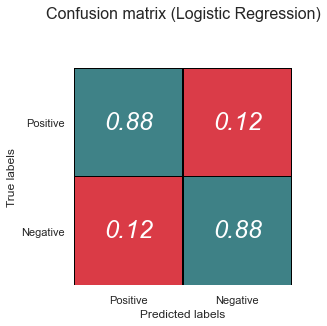

In [52]:
fig, axis1 = plt.subplots(nrows=1, ncols=1)
plot_confusion_matrix(y_test, lr_pred,  ax=axis1, title='Confusion matrix (Logistic Regression)')

<p><strong><span style="font-size: 17px; font-family: Candara, Lato, Arial, Verdana;">KNearest Neighbors Classifier</span></strong><span style="font-size: 17px;"><span style="font-family: Candara, Lato, Arial, Verdana;"></span></span></p>

In [53]:
# hyper paramter tuning
parameters = {
    'leaf_size' : np.linspace(1, 10, 5),
    'n_neighbors' : list(range(2,10)),
    'weights': ['uniform', 'distance'],
    'metric' : ['euclidean', 'manhattan']
             }
clf = GridSearchCV(KNeighborsClassifier(), parameters, cv=6, verbose=5, n_jobs=-1)

In [54]:
clf.fit(X_train, y_train)

Fitting 6 folds for each of 160 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 228 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 480 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 804 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:   10.2s finished


GridSearchCV(cv=6, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': array([ 1.  ,  3.25,  5.5 ,  7.75, 10.  ]),
                         'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9],
                         'weights': ['uniform', 'distance']},
             verbose=5)

In [55]:
clf.best_params_

{'leaf_size': 1.0,
 'metric': 'manhattan',
 'n_neighbors': 2,
 'weights': 'distance'}

In [56]:
knn = KNeighborsClassifier(n_neighbors = 2, leaf_size = 1.0, metric = 'manhattan', weights = 'distance')
knn.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=1.0, metric='manhattan', n_neighbors=2,
                     weights='distance')

In [57]:
knn_pred = knn.predict(X_test)
knn_score = f1_score(y_test, knn_pred)
knn_acc = accuracy_score(y_test, knn_pred)

models['KNeighborsClassifier']['name'] = 'K Nearest Neighbors Classifier'
models['KNeighborsClassifier']['f1'] = knn_score
models['KNeighborsClassifier']['accuracy'] = knn_acc
pprint(models['KNeighborsClassifier'], indent = 2, compact = True)

{ 'accuracy': 0.9782448377581121,
  'f1': 0.9777777777777779,
  'name': 'K Nearest Neighbors Classifier'}


In [58]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1404
           1       0.96      0.99      0.98      1308

    accuracy                           0.98      2712
   macro avg       0.98      0.98      0.98      2712
weighted avg       0.98      0.98      0.98      2712



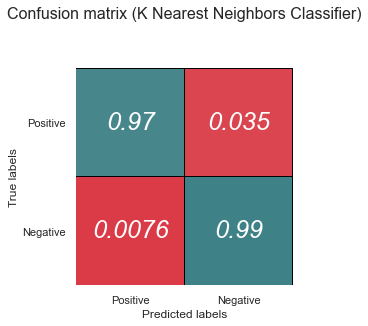

In [59]:
fig, axis1 = plt.subplots(nrows=1, ncols=1)
plot_confusion_matrix(y_test, knn_pred,  ax=axis1, title='Confusion matrix (K Nearest Neighbors Classifier)')

<p><strong><span style="font-size: 17px; font-family: Candara, Lato, Arial, Verdana;">Naïve Bayes Classifier</span></strong><span style="font-size: 17px;"><span style="font-family: Candara, Lato, Arial, Verdana;"></span></span></p>

In [60]:
naive_model = GaussianNB()
naive_model.fit(X_train, y_train)

nb_pred = naive_model.predict(X_test)
nb_score = f1_score(y_test, nb_pred)
nb_acc = accuracy_score(y_test, nb_pred)

models['GuassianNB']['name'] = 'Naive Bayes Classifier'
models['GuassianNB']['f1'] = nb_score
models['GuassianNB']['accuracy'] = nb_acc
pprint(models['GuassianNB'], indent = 2, compact = True)

{ 'accuracy': 0.8617256637168141,
  'f1': 0.8541423570595099,
  'name': 'Naive Bayes Classifier'}


In [61]:
print(classification_report(y_test, nb_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1404
           1       0.87      0.84      0.85      1308

    accuracy                           0.86      2712
   macro avg       0.86      0.86      0.86      2712
weighted avg       0.86      0.86      0.86      2712



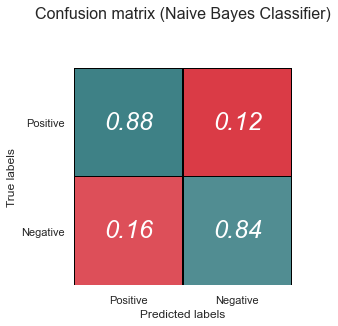

In [62]:
fig, axis1 = plt.subplots(nrows=1, ncols=1)
plot_confusion_matrix(y_test, nb_pred,  ax=axis1, title='Confusion matrix (Naive Bayes Classifier)')

<p><strong><span style="font-size: 17px; font-family: Candara, Lato, Arial, Verdana;">Support Vector Classifier</span></strong><span style="font-size: 17px;"><span style="font-family: Candara, Lato, Arial, Verdana;"></span></span></p>

In [63]:
# hyper paramter tuning
parameters = {'C':[1,10,100],'gamma':[1,0.1,0.001], 'kernel':['linear','rbf']}
clf = GridSearchCV(SVC(), parameters, cv=6, verbose=5, n_jobs=-1)

In [64]:
clf.fit(X_train, y_train)

Fitting 6 folds for each of 18 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  99 out of 108 | elapsed:   16.0s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:   21.0s finished


GridSearchCV(cv=6, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10, 100], 'gamma': [1, 0.1, 0.001],
                         'kernel': ['linear', 'rbf']},
             verbose=5)

In [65]:
clf.best_params_

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}

In [66]:
svc = SVC(C = 100, gamma = 1, kernel = 'rbf', probability = True, random_state = seed)
svc.fit(X_train, y_train)

SVC(C=100, gamma=1, probability=True, random_state=77)

In [67]:
svc_pred = svc.predict(X_test)
svc_score = f1_score(y_test, svc_pred)
svc_acc = accuracy_score(y_test, svc_pred)

models['SVC']['name'] = 'Support Vector Classifier'
models['SVC']['f1'] = svc_score
models['SVC']['accuracy'] = svc_acc
pprint(models['SVC'], indent = 2, compact = True)

{ 'accuracy': 0.9745575221238938,
  'f1': 0.9737342976779597,
  'name': 'Support Vector Classifier'}


In [68]:
print(classification_report(y_test, svc_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1404
           1       0.97      0.98      0.97      1308

    accuracy                           0.97      2712
   macro avg       0.97      0.97      0.97      2712
weighted avg       0.97      0.97      0.97      2712



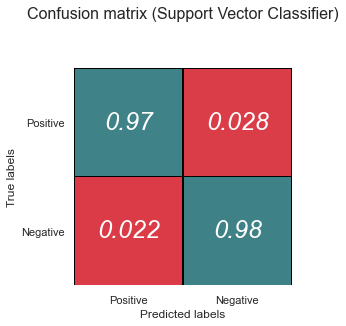

In [69]:
fig, axis1 = plt.subplots(nrows=1, ncols=1)
plot_confusion_matrix(y_test, svc_pred,  ax=axis1, title='Confusion matrix (Support Vector Classifier)')

<p><strong><span style="font-size: 17px; font-family: Candara, Lato, Arial, Verdana;">Decision Tree Classifier</span></strong><span style="font-size: 17px;"><span style="font-family: Candara, Lato, Arial, Verdana;"></span></span></p>

In [70]:
# hyper paramter tuning
parameters = {'criterion' : ['gini', 'entropy'],
               'max_depth': list(range(3, 25))
             }
clf = GridSearchCV(DecisionTreeClassifier(), parameters, cv=6, verbose=5, n_jobs=-1)

In [71]:
clf.fit(X_train, y_train)

Fitting 6 folds for each of 44 candidates, totalling 264 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 233 out of 264 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 264 out of 264 | elapsed:    0.3s finished


GridSearchCV(cv=6, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23,
                                       24]},
             verbose=5)

In [72]:
clf.best_params_

{'criterion': 'gini', 'max_depth': 14}

In [73]:
dtree = DecisionTreeClassifier(criterion = 'gini', max_depth = 14, random_state = seed)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=17, random_state=77)

In [74]:
dtree_pred = dtree.predict(X_test)
dtree_score = f1_score(y_test, dtree_pred)
dtree_acc = accuracy_score(y_test, dtree_pred)

models['DecisionTreeClassifier']['name'] = 'Decision Tree Classifier'
models['DecisionTreeClassifier']['f1'] = dtree_score
models['DecisionTreeClassifier']['accuracy'] = dtree_acc
pprint(models['DecisionTreeClassifier'], indent = 2, compact = True)

{ 'accuracy': 0.9808259587020649,
  'f1': 0.9802581624905087,
  'name': 'Decision Tree Classifier'}


In [75]:
print(classification_report(y_test, dtree_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1404
           1       0.97      0.99      0.98      1308

    accuracy                           0.98      2712
   macro avg       0.98      0.98      0.98      2712
weighted avg       0.98      0.98      0.98      2712



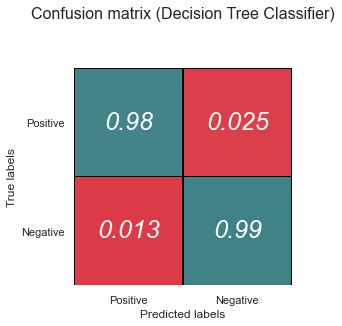

In [76]:
fig, axis1 = plt.subplots(nrows=1, ncols=1)
plot_confusion_matrix(y_test, dtree_pred,  ax=axis1, title='Confusion matrix (Decision Tree Classifier)')

<p><strong><span style="font-size: 17px; font-family: Candara, Lato, Arial, Verdana;">Random Forest Classifier</span></strong><span style="font-size: 17px;"><span style="font-family: Candara, Lato, Arial, Verdana;"></span></span></p>

In [77]:
# hyper paramter tuning
parameters = {'max_features': ['auto', 'sqrt'],
              'n_estimators' : [100, 500, 1000, 1500, 2000, 2500, 3000],
              'max_depth' : [5, 20, 45, 55],
              'bootstrap': [True, False]}
clf = GridSearchCV(RandomForestClassifier(), parameters, cv=4, verbose=6, n_jobs=-1)

In [78]:
clf.fit(X_train, y_train)

Fitting 4 folds for each of 112 candidates, totalling 448 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:   36.7s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 281 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 448 out of 448 | elapsed:  4.1min finished


GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [5, 20, 45, 55],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [100, 500, 1000, 1500, 2000, 2500,
                                          3000]},
             verbose=6)

In [79]:
clf.best_params_

{'bootstrap': False,
 'max_depth': 20,
 'max_features': 'sqrt',
 'n_estimators': 2000}

In [80]:
forest = RandomForestClassifier(n_estimators = 2000, max_features = 'sqrt', \
                                max_depth = 20, min_samples_split = 2, \
                                min_samples_leaf = 1, bootstrap = False, \
                                random_state = seed)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=20, max_features='sqrt',
                       n_estimators=2000, random_state=77)

In [81]:
forest_pred = forest.predict(X_test)
forest_score = f1_score(y_test, forest_pred)
forest_acc = accuracy_score(y_test, forest_pred)

models['RandomForestClassifier']['name'] = 'Random Forest Classifier'
models['RandomForestClassifier']['f1'] = forest_score
models['RandomForestClassifier']['accuracy'] = forest_acc
pprint(models['RandomForestClassifier'], indent = 2, compact = True)

{ 'accuracy': 0.9922566371681416,
  'f1': 0.9919877909194963,
  'name': 'Random Forest Classifier'}


In [82]:
print(classification_report(y_test, forest_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1404
           1       0.99      0.99      0.99      1308

    accuracy                           0.99      2712
   macro avg       0.99      0.99      0.99      2712
weighted avg       0.99      0.99      0.99      2712



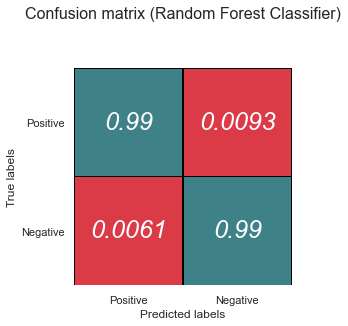

In [83]:
fig, axis1 = plt.subplots(nrows=1, ncols=1) 
plot_confusion_matrix(y_test, forest_pred,  ax=axis1, title='Confusion matrix (Random Forest Classifier)')

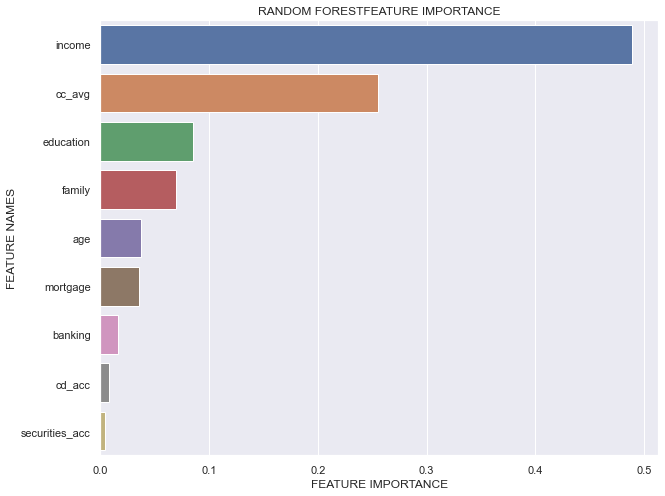

In [84]:
sns.set()
plot_feature_importance(forest.feature_importances_, X_resampled.columns, 'RANDOM FOREST')

<p>
  <span style="font-family: Candara, Lato, Verdana, Geneva, sans-serif;">
    <span style="font-size: 17px;">Hence, we can confirm that the most important features for the target prediction are indeed 
      <strong>income, CC_Avg, Education, Family
      </strong> along with somewhat important features age, mortgage, banking, CD_Account, Securities_Account.
      <br>
    </span>
  </span>
</p>
<p>
  <span style="font-family: Candara, Lato, Verdana, Geneva, sans-serif;">
    <span style="font-size: 17px;">
      <br>
    </span>
  </span>
</p>


<p><strong><span style="font-size: 17px; font-family: Candara, Lato, Arial, Verdana;">Predict Likelihood for a new customer to buy personal loan</span></strong><span style="font-size: 17px;"><span style="font-family: Candara, Lato, Arial, Verdana;"></span></span></p>

In [85]:
# Let's assume a few sample values for other variables to predict the likelihood.
data_point = pd.DataFrame({'age': [25, 50, 25],
                           'experience' : [3, 20, 3],
                           'income': [155, 172, 100],
                           'family' : [3, 4, 1],
                           'cc_avg' : [6.5, 8.5, 0.0],
                           'education' : [2, 1, 0],
                           'mortgage' : [0, 0, 0],
                           'securities_acc' : [1, 0, 0],
                           'cd_acc' : [1, 1, 0],
                           'online' : [1, 0, 0],
                           'credit_card' : [1, 0, 0],
                        })
data_point.T

0      1      2
age              25.0   50.0   25.0
experience        3.0   20.0    3.0
income          155.0  172.0  100.0
family            3.0    4.0    1.0
cc_avg            6.5    8.5    0.0
education         2.0    1.0    0.0
mortgage          0.0    0.0    0.0
securities_acc    1.0    0.0    0.0
cd_acc            1.0    1.0    0.0
online            1.0    0.0    0.0
credit_card       1.0    0.0    0.0

In [86]:
data_point['banking'] = data_point.online + data_point.credit_card
data_point.drop(['online', 'credit_card', 'experience'], axis = 1, inplace = True)

In [87]:
data_point[['age', 'income', 'family', 'cc_avg', 'education', 'mortgage', 'securities_acc', 'cd_acc', 'banking']] = \
        scaler.transform(data_point[['age', 'income', 'family', 'cc_avg', 'education', 'mortgage', 'securities_acc', 'cd_acc', 'banking']])
# scaled data point
data_point

age    income    family    cc_avg  education  mortgage  \
0 -1.767216  0.914451  0.630742  1.759947   0.136467 -0.571732   
1  0.435920  1.233688  1.572095  2.726406  -1.177933 -0.571732   
2 -1.767216 -0.118376 -1.251964 -1.381043  -2.492332 -0.571732   

   securities_acc    cd_acc   banking  
0        3.774678  3.736283  1.938465  
1       -0.264923  3.736283 -1.233250  
2       -0.264923 -0.267646 -1.233250

<p>
  <span style="font-family: Verdana, Geneva, sans-serif; font-size: 17px;">We predict the likelihood of personal_loan == 1 (i.e, taking a personal loan) of the above sample data points using the models that were fitted on the dataset.
    <br>
    We could even set our own threshold for the probability at which we predict the output as 1 and make custom predictions and the threshold would depend on whether we want to avoid False positives more or False negatives more.
  </span>
</p>


In [88]:
# probabilites of the three records
lr.predict_proba(data_point)[:, 1]

array([0.92433549, 0.99893312, 0.08865637])

In [89]:
# classification prediction of the three records.
lr.predict(data_point)

array([1, 1, 0], dtype=int64)

In [90]:
knn.predict_proba(data_point)[:, 1]

array([1., 1., 0.])

In [91]:
knn.predict(data_point)

array([1, 1, 0], dtype=int64)

In [92]:
naive_model.predict_proba(data_point)[:, 1]

array([0.9671904 , 0.99999998, 0.02012116])

In [93]:
naive_model.predict(data_point)

array([1, 1, 0], dtype=int64)

In [94]:
svc.predict_proba(data_point)[:, 1]

array([0.2790788 , 0.22209039, 0.16092431])

In [95]:
svc.predict(data_point)

array([0, 0, 0], dtype=int64)

In [96]:
dtree.predict_proba(data_point)[:, 1]

array([1., 1., 0.])

In [97]:
dtree.predict(data_point)

array([1, 1, 0], dtype=int64)

In [98]:
forest.predict_proba(data_point)[:, 1]

array([0.9095, 0.888 , 0.014 ])

In [99]:
forest.predict(data_point)

array([1, 1, 0], dtype=int64)

<h2><span style="font-family: Candara, Lato, Arial, Verdana; font-size: 22px;">Model Evaluation</span></h2>

In [100]:
results = pd.DataFrame(dict(models)).T.sort_values(by=['f1', 'accuracy'], ascending = [False, False])

In [101]:
results.set_index('name')

f1  accuracy
name                                              
Random Forest Classifier        0.991988  0.992257
Decision Tree Classifier        0.980258  0.980826
K Nearest Neighbors Classifier  0.977778  0.978245
Support Vector Classifier       0.973734  0.974558
Logistic Regression             0.874715  0.878319
Naive Bayes Classifier          0.854142  0.861726

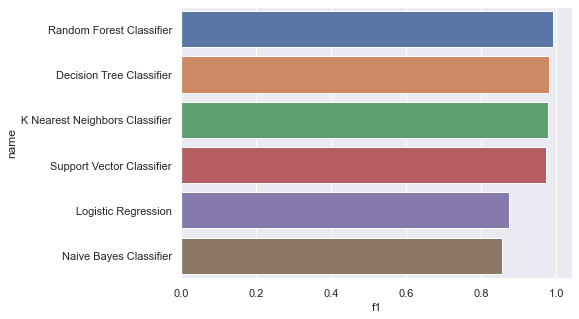

In [102]:
sns.set()
plt.figure(figsize=(7,5))
sns.barplot(x = "f1", y = "name", data = results)
plt.show()

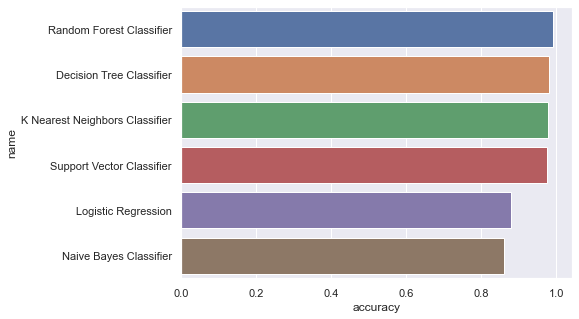

In [103]:
sns.set()
plt.figure(figsize=(7,5))
sns.barplot(x = "accuracy", y = "name", data = results)
plt.show()

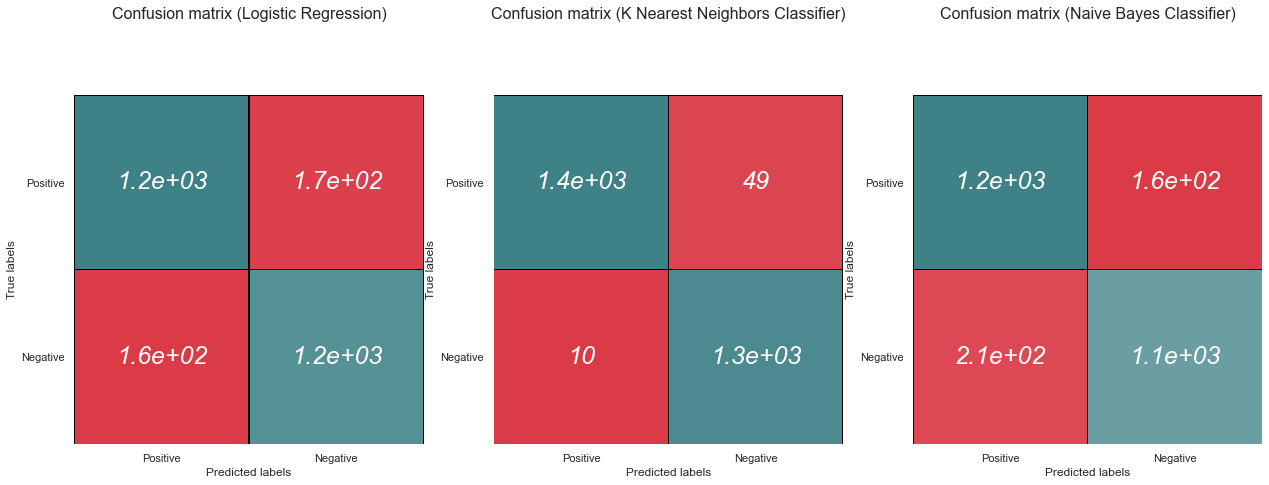

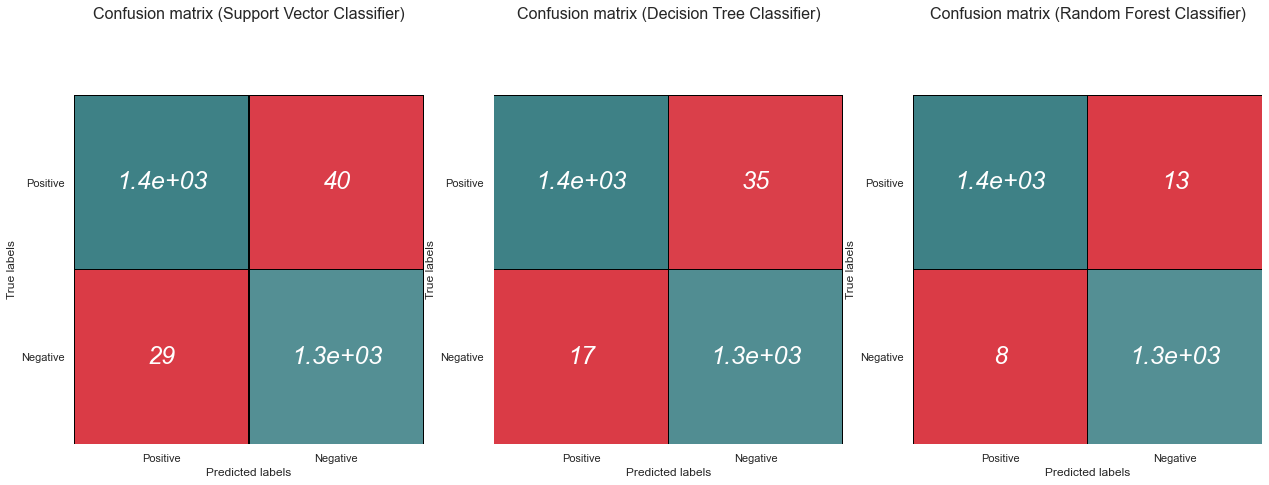

In [104]:
# confusion matrix of random forest
sns.set()
fig=plt.figure(figsize=(16.5, 8.5))
plt.subplots_adjust(left=1, right=2)
ax=fig.add_subplot(1,3,1)
plot_confusion_matrix(y_test, lr_pred,  ax=ax, title='Confusion matrix (Logistic Regression)', normalized = False)
ax=fig.add_subplot(1,3,2)
plot_confusion_matrix(y_test, knn_pred,  ax=ax, title='Confusion matrix (K Nearest Neighbors Classifier)', normalized = False)
ax=fig.add_subplot(1,3,3)
plot_confusion_matrix(y_test, nb_pred,  ax=ax, title='Confusion matrix (Naive Bayes Classifier)', normalized = False)
plt.show()
fig=plt.figure(figsize=(16.5,8.5))
plt.subplots_adjust(left=1, right=2)
ax=fig.add_subplot(1,3,1)
plot_confusion_matrix(y_test, svc_pred,  ax=ax, title='Confusion matrix (Support Vector Classifier)', normalized = False)
ax=fig.add_subplot(1,3,2)
plot_confusion_matrix(y_test, dtree_pred,  ax=ax, title='Confusion matrix (Decision Tree Classifier)', normalized = False)
ax=fig.add_subplot(1,3,3)
plot_confusion_matrix(y_test, forest_pred,  ax=ax, title='Confusion matrix (Random Forest Classifier)', normalized = False)
plt.show()

<p>
  <span style="font-size: 17px; font-family: Candara, Verdana, Geneva, sans-serif;">We have chosen the F1 Score as the metric to judge our models since we are concerned with Positive Class and the Classification Class is Imbalanced. So, Using F1 Score is a viable option to judge the models as it takes into consideration both False Positives and False Negatives while scoring.
    <br>
    Also, looking at the confusion matrices for all models we can see that the random forest classifier only makes <strong>13 False Negatives and 8 False Positives</strong>. 
    <br>
    Hence 
    <strong>Random Forest Classifier
    </strong> is the best model with an 
    <strong>F1 score of 0.991
    </strong> and 
    <strong>accuracy of 0.992
    </strong>
  </span>
</p>

<p>
  <span style="font-size: 17px; font-family: Candara, Verdana, Geneva, sans-serif;">
    Random Forest Classifier is an ensemble model which employs multiple decision trees to classify. So, it's not prone to overfitting and generally quite robust in classification tasks. It's performace comes from the fact that it's an ensemble model which also makes use of the most important predictors.
    <br>
    Also, K Neighbors Classifier performs well on this dataset as it's able to learn from similar datapoints. i.e, Similar data points with similar values for the attributes tend to have similary target response.
  </span>
</p>